In [113]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [111]:
flowering_df = pd.read_csv('../data/floweringTime.csv')
for col in flowering_df.columns:
    print(col)
flowering_df.dropna(inplace=True)

plant
line
End date of stratifications
Flowering date
days_after_stratification
total_rosette_leaves
mutant_wt
damage_associated


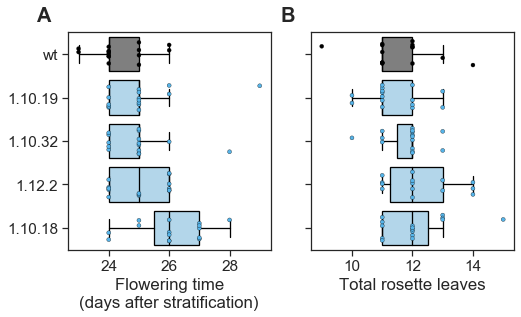

In [112]:
fig, axs = plt.subplots(ncols=2, figsize=(8,4))

# sns.plotting_context()
sns.set(font_scale = 1.4, font='Arial')
sns.set_style(style='ticks')


# Choose hue colour palette
colours = ['#000000', '#56B4E9', '#56B4E9', '#56B4E9', '#56B4E9']

# Flowering date plot

ax0_boxplot = sns.boxplot(x='days_after_stratification', y='line', data=flowering_df, ax=axs[0], palette=colours,
           order=['wt', '1.10.19', '1.10.32', '1.12.2', '1.10.18'], linewidth=1.3, showfliers = False)

ax0_stripplot = sns.stripplot(x='days_after_stratification', y='line', data=flowering_df, ax=axs[0], palette=colours, alpha=1,
           order=['wt', '1.10.19', '1.10.32', '1.12.2', '1.10.18'], jitter=0.3, edgecolor='gray', linewidth=0.3, size=4)

# Rosette number plot

ax1_boxplot = sns.boxplot(x='total_rosette_leaves', y='line', data=flowering_df, ax=axs[1], palette=colours,
           order=['wt', '1.10.19', '1.10.32', '1.12.2', '1.10.18'], linewidth=1.3, showfliers = False)

ax0_stripplot = sns.stripplot(x='total_rosette_leaves', y='line', data=flowering_df, ax=axs[1], palette=colours, alpha=1,
           order=['wt', '1.10.19', '1.10.32', '1.12.2', '1.10.18'], jitter=0.3, edgecolor='gray', linewidth=0.3, size=4)

# Apply transparency to boxplots

for patch in ax0_boxplot.artists:
    red, green, blue, alpha = patch.get_facecolor()
    patch.set_facecolor((red, green, blue, .5))
for patch in ax1_boxplot.artists:
    red, green, blue, alpha = patch.get_facecolor()
    patch.set_facecolor((red, green, blue, .5))
    
# Axes labels

axs[0].set_xlabel('Flowering time\n(days after stratification)')
axs[0].set_ylabel('')
axs[1].set_xlabel('Total rosette leaves')
axs[1].set_ylabel('')
axs[1].set_yticklabels(['', '', '', '', ''])

# Subplot labels

labels = ['A', 'B']
for n, ax in enumerate(axs):  
    ax.text(-0.15, 1.05, labels[n], transform=ax.transAxes, 
            size=20, weight='bold')

plt.savefig("../figures/floweringTime.pdf", transparent=True, dpi=300, bbox_inches='tight')

#### t-test

In [125]:
print('Flowering time t-test')
for line in ['1.10.19', '1.10.32', '1.12.2', '1.10.18']:
    t_test = stats.ttest_ind(flowering_df[flowering_df['line'] == 'wt']['days_after_stratification'].to_list(), 
                    flowering_df[flowering_df['line'] == line]['days_after_stratification'].to_list(),
                   equal_var=True)
    print(line)
    print(t_test)

Flowering time t-test
1.10.19
Ttest_indResult(statistic=-1.6439898730535758, pvalue=0.1113615690638979)
1.10.32
Ttest_indResult(statistic=-1.5004187020318858, pvalue=0.14469889578159362)
1.12.2
Ttest_indResult(statistic=-1.9779965135229223, pvalue=0.058217361679397325)
1.10.18
Ttest_indResult(statistic=-4.370904196324807, pvalue=0.00015435860023505833)


In [126]:
print('Rosette leaf number t-test')
for line in ['1.10.19', '1.10.32', '1.12.2', '1.10.18']:
    t_test = stats.ttest_ind(flowering_df[flowering_df['line'] == 'wt']['total_rosette_leaves'].to_list(), 
                    flowering_df[flowering_df['line'] == line]['total_rosette_leaves'].to_list(),
                   equal_var=True)
    print(line)
    print(t_test)

Rosette leaf number t-test
1.10.19
Ttest_indResult(statistic=0.3567530340063366, pvalue=0.7239512611995826)
1.10.32
Ttest_indResult(statistic=-0.7559289460184567, pvalue=0.45600479106550085)
1.12.2
Ttest_indResult(statistic=-1.7887599079258663, pvalue=0.0848802121721816)
1.10.18
Ttest_indResult(statistic=-1.3126602466277868, pvalue=0.19995559828623255)
